In [1]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping  
import glob as gb 
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

2024-05-17 07:14:02.999216: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 07:14:03.746231: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
IMG_SIZE = 224
SEED = 1000
BATCH_SIZE = 16
TRAIN_DIR = '/mnt/g/food-101.zip/Training_data'
TEST_DIR = '/mnt/g/food-101.zip/Test_data'

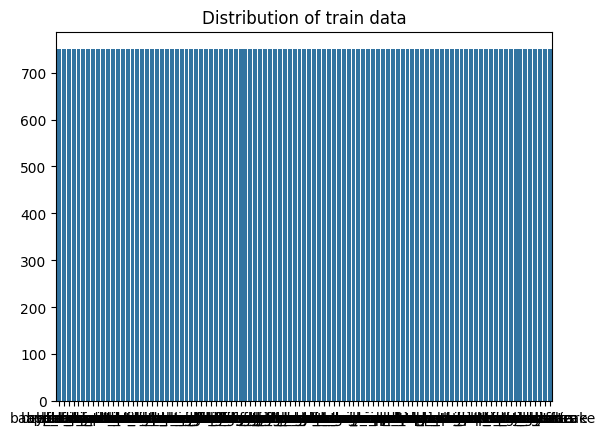

75750


In [3]:
categories = []
class_count=[]
train_exm = 0
for f in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname=str(TRAIN_DIR + '/' + f + '/*.jpg'))
    categories.append(f)
    class_count.append(len(files))
    train_exm += len(files)

sns.barplot(x=categories, y=class_count).set_title("Distribution of train data")

plt.show()
print(train_exm)

In [4]:
# def preprocess_input(img):
#     img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
#     img = tf.keras.applications.efficientnet.preprocess_input(img)
#     return img

train_gen = ImageDataGenerator(
   rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    shear_range=0.1,
    validation_split=0.2,
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
    #dtype=tf.float32

)

test_gen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
    #dtype=tf.float32
)

In [5]:
train_batch = train_gen.flow_from_directory(
    directory = TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset = 'training',
    seed=SEED
)

valid_batch = train_gen.flow_from_directory(
    directory = TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset = 'validation',
    seed=SEED
)

test_batch = test_gen.flow_from_directory(
    directory = TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    seed = SEED
)

Found 60600 images belonging to 101 classes.
Found 15150 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


In [6]:
img_shape = (IMG_SIZE, IMG_SIZE) +(3,)
base_model = tf.keras.applications.EfficientNetB6(input_shape=img_shape, include_top=False, weights='imagenet')
base_model.summary()


2024-05-17 07:15:47.811209: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-17 07:15:48.009211: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-17 07:15:48.009259: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-17 07:15:48.011183: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-17 07:15:48.011248: I external/local_xla/xla/stream_executor

165234480/165234480 ━━━━━━━━━━━━━━━━━━━━ 36s 0us/step


Model: "efficientnetb6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │      1,512 │ stem_conv_pad[0]… │
│                     │ 56)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        224 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 56)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 56)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        504 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 56)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        224 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 56)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 56)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 56)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 56)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 14)  │        798 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 56)  │        840 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 56)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │      1,792 │ block1a_se_excit

 Total params: 40,960,143 (156.25 MB)

 Trainable params: 40,735,704 (155.39 MB)

 Non-trainable params: 224,439 (876.72 KB)

In [7]:
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dropout(0.2)(x)  # Corrected dropout without activation
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(101, activation='softmax')(x)
model = tf.keras.Model(inputs, output)
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb6 (Functional)     │ (None, 7, 7, 2304)     │    40,960,143 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2304)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 101)            │        13,029 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,317,556 (161.43 MB)

 Trainable params: 42,093,117 (160.57 MB)

 Non-trainable params: 224,439 (876.72 KB)

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
loss=tf.keras.losses.sparse_categorical_crossentropy,
metrics=['accuracy'])  

In [9]:
h = model.fit(train_batch, 
    steps_per_epoch=642,
validation_data=valid_batch,
validation_steps=158,
 epochs=50, 
 callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)],
 verbose=1)

Epoch 1/50


/home/tan/anaconda3/envs/myenv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1715909141.111574  142397 service.cc:145] XLA service 0x7f0c9c003380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715909141.113096  142397 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-05-17 07:25:44.312285: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-17 07:25:56.893144: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8900
I0000 

297/642 ━━━━━━━━━━━━━━━━━━━━ 1:26 251ms/step - accuracy: 0.0113 - loss: 4.6278

2024-05-17 07:38:53.790997: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng48{k0=1,k2=5,k5=2,k14=6} for conv (f32[2064,1,5,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,2064,7,7]{3,2,1,0}, f32[8,2064,7,7]{3,2,1,0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, feature_group_count=2064, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-05-17 07:38:53.915172: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.124337662s
Trying algorithm eng48{k0=1,k2=5,k5=2,k14=6} for conv (f32[2064,1,5,5]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,2064,7,7]{3,2,1,0}, f32[8,2064,7,7]{3,2,1,0}), window={size=5x5 pad=2_2x2_2}, dim_labels=bf01_oi01->bf01, feature_group_count=2064, custom_call_target="__cudnn$convBackwardFilter

642/642 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0176 - loss: 4.5997

I0000 00:00:1715910127.414584  150206 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_5539', 4 bytes spill stores, 4 bytes spill loads



642/642 ━━━━━━━━━━━━━━━━━━━━ 1110s 1s/step - accuracy: 0.0176 - loss: 4.5996 - val_accuracy: 0.1361 - val_loss: 4.1013
Epoch 2/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 186s 289ms/step - accuracy: 0.1240 - loss: 4.0050 - val_accuracy: 0.3331 - val_loss: 2.9721
Epoch 3/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 178s 277ms/step - accuracy: 0.2611 - loss: 3.2225 - val_accuracy: 0.4664 - val_loss: 2.2625
Epoch 4/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 174s 271ms/step - accuracy: 0.3530 - loss: 2.7655 - val_accuracy: 0.5324 - val_loss: 1.9239
Epoch 5/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 166s 258ms/step - accuracy: 0.4329 - loss: 2.3803 - val_accuracy: 0.5854 - val_loss: 1.7377
Epoch 6/50
578/642 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - accuracy: 0.4639 - loss: 2.1805

2024-05-17 07:56:32.784786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 07:56:32.786042: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/home/tan/anaconda3/envs/myenv/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
I0000 00:00:1715911021.940706  156257 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_5532', 8 bytes spill stores, 8 bytes spill loads



642/642 ━━━━━━━━━━━━━━━━━━━━ 156s 243ms/step - accuracy: 0.4650 - loss: 2.1794 - val_accuracy: 0.5960 - val_loss: 1.7100
Epoch 7/50


2024-05-17 07:57:09.575619: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 07:57:09.576128: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 166s 256ms/step - accuracy: 0.5003 - loss: 2.0752 - val_accuracy: 0.6096 - val_loss: 1.6043
Epoch 8/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 159s 247ms/step - accuracy: 0.5475 - loss: 1.8579 - val_accuracy: 0.6400 - val_loss: 1.5100
Epoch 9/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 154s 240ms/step - accuracy: 0.5553 - loss: 1.8093 - val_accuracy: 0.6610 - val_loss: 1.4810
Epoch 10/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 160s 250ms/step - accuracy: 0.5833 - loss: 1.7177 - val_accuracy: 0.6713 - val_loss: 1.3730
Epoch 11/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 154s 240ms/step - accuracy: 0.6100 - loss: 1.6218 - val_accuracy: 0.6831 - val_loss: 1.3475
Epoch 12/50
578/642 ━━━━━━━━━━━━━━━━━━━━ 11s 187ms/step - accuracy: 0.6087 - loss: 1.6083

2024-05-17 08:12:10.836685: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 08:12:10.838182: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 133s 206ms/step - accuracy: 0.6098 - loss: 1.6052 - val_accuracy: 0.6873 - val_loss: 1.3515
Epoch 13/50


2024-05-17 08:12:35.239896: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 08:12:35.240712: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 159s 246ms/step - accuracy: 0.6383 - loss: 1.4794 - val_accuracy: 0.6938 - val_loss: 1.3151
Epoch 14/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 156s 243ms/step - accuracy: 0.6456 - loss: 1.4678 - val_accuracy: 0.6962 - val_loss: 1.3726
Epoch 15/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 155s 241ms/step - accuracy: 0.6649 - loss: 1.3846 - val_accuracy: 0.6942 - val_loss: 1.3517
Epoch 16/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 152s 237ms/step - accuracy: 0.6821 - loss: 1.2980 - val_accuracy: 0.6962 - val_loss: 1.3072
Epoch 17/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 148s 231ms/step - accuracy: 0.6804 - loss: 1.3056 - val_accuracy: 0.7152 - val_loss: 1.2699
Epoch 18/50
578/642 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.6894 - loss: 1.2516

2024-05-17 08:27:11.860081: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 08:27:11.861405: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 130s 203ms/step - accuracy: 0.6894 - loss: 1.2541 - val_accuracy: 0.7323 - val_loss: 1.2325
Epoch 19/50


2024-05-17 08:27:35.985375: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 08:27:35.985844: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 155s 238ms/step - accuracy: 0.6886 - loss: 1.2459 - val_accuracy: 0.7172 - val_loss: 1.3095
Epoch 20/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 153s 238ms/step - accuracy: 0.7145 - loss: 1.1900 - val_accuracy: 0.7128 - val_loss: 1.3490
Epoch 21/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 152s 237ms/step - accuracy: 0.7163 - loss: 1.1642 - val_accuracy: 0.7140 - val_loss: 1.3423
Epoch 22/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 150s 234ms/step - accuracy: 0.7190 - loss: 1.1628 - val_accuracy: 0.7025 - val_loss: 1.3649
Epoch 23/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 145s 226ms/step - accuracy: 0.7235 - loss: 1.1387 - val_accuracy: 0.7294 - val_loss: 1.2176
Epoch 24/50
578/642 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.7431 - loss: 1.0387

2024-05-17 08:41:52.404548: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 08:41:52.405019: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 126s 196ms/step - accuracy: 0.7430 - loss: 1.0397 - val_accuracy: 0.7510 - val_loss: 1.1857
Epoch 25/50


2024-05-17 08:42:15.875377: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-17 08:42:15.876387: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


642/642 ━━━━━━━━━━━━━━━━━━━━ 159s 245ms/step - accuracy: 0.7478 - loss: 1.0541 - val_accuracy: 0.7310 - val_loss: 1.2029
Epoch 26/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 151s 235ms/step - accuracy: 0.7442 - loss: 1.0311 - val_accuracy: 0.7512 - val_loss: 1.2051
Epoch 27/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 149s 232ms/step - accuracy: 0.7515 - loss: 1.0082 - val_accuracy: 0.7322 - val_loss: 1.2272
Epoch 28/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 147s 229ms/step - accuracy: 0.7526 - loss: 0.9952 - val_accuracy: 0.7314 - val_loss: 1.2799
Epoch 29/50
642/642 ━━━━━━━━━━━━━━━━━━━━ 138s 215ms/step - accuracy: 0.7594 - loss: 0.9657 - val_accuracy: 0.7251 - val_loss: 1.3643


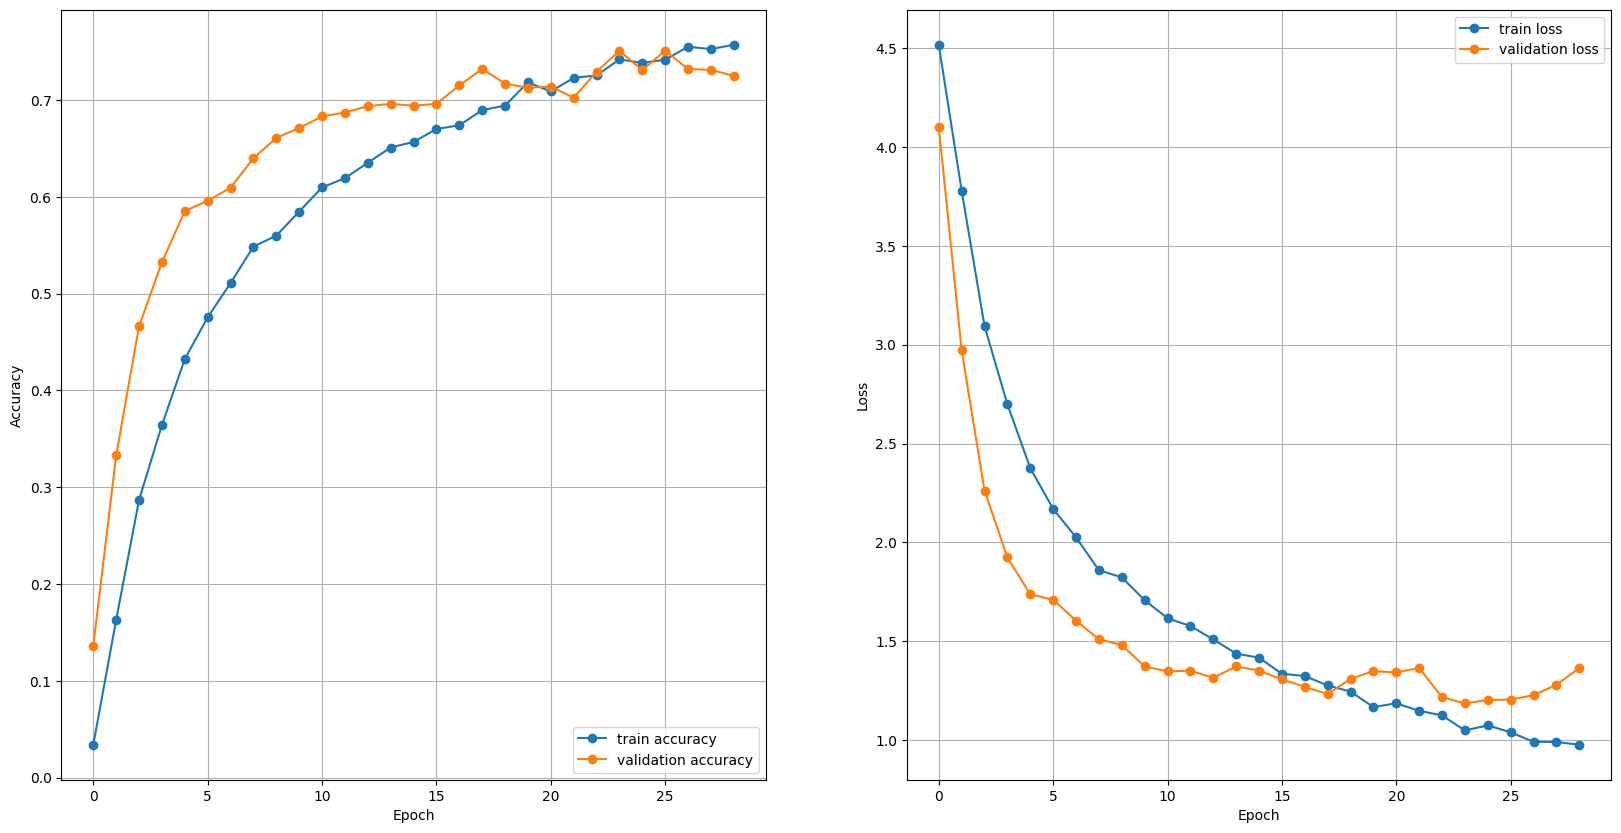

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()